<a href="https://colab.research.google.com/github/IagoMagalhaes23/Yolo/blob/main/Yolo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolo V9
**- Autor:** Iago Magalhães

**- Descrição:** O YOLOv9, como seu antecessor, concentra-se na identificação e localização de objetos em imagens e vídeos. Aplicações como carros autônomos, sistemas de segurança e pesquisa avançada de imagens dependem fortemente desse recurso. O YOLOv9 apresenta inovações ainda mais impressionantes do que o YOLOv8.

##Instalação de bibliotecas

In [1]:
!pip install opencv-python ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

##Importação de bibliotecas

In [8]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

##Selecionando o modelo

In [3]:
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:00<00:00, 132MB/s]


##Funções

In [4]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results

##Reconhecendo objetos em imagens

In [13]:
# read the image
image = cv2.imread("/content/image.jpg")

In [14]:
result_img, _ = predict_and_detect(model, image, classes=[], conf=0.5)


0: 384x640 1 person, 1 chair, 1 dining table, 1 cell phone, 152.8ms
Speed: 2.3ms preprocess, 152.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


##Salvando resultados

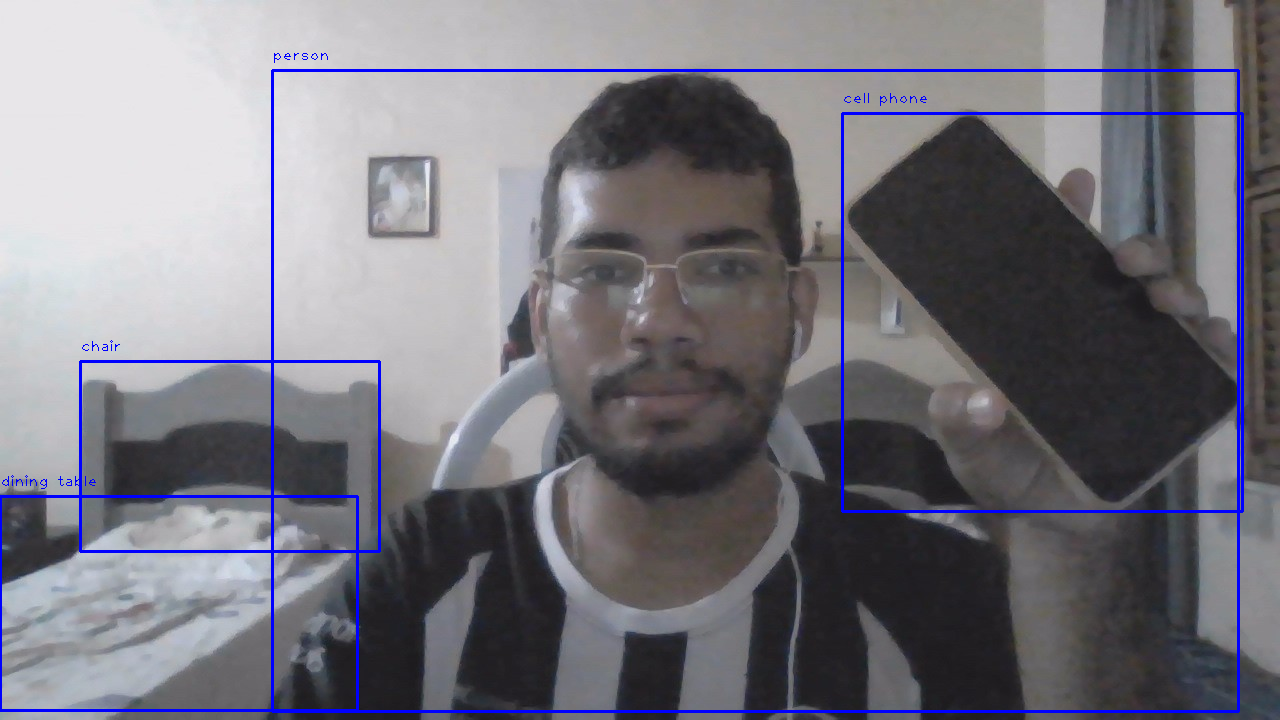

-1

In [15]:
cv2_imshow(result_img)
cv2.imwrite("result.png", result_img)
cv2.waitKey(0)

##Reconhecendo objetos em videos

In [ ]:
video_path = r"YourVideoPath"

In [ ]:
cap = cv2.VideoCapture(video_path)
while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    cv2_imshow(result_img)

    cv2.waitKey(1)

##Salvando resultados

In [ ]:
# defining function for creating a writer (for mp4 videos)
def create_video_writer(video_cap, output_filename):
    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))
    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))
    return writer

In [ ]:
output_filename = "YourFilename"
writer = create_video_writer(cap, output_filename)

video_path = r"YourVideoPath"
cap = cv2.VideoCapture(video_path)
while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    writer.write(result_img)
    cv2_imshow(result_img)

    cv2.waitKey(1)
writer.release()

##Referências
- [How to use YOLOv9 for Object Detection](https://medium.com/@Mert.A/how-to-use-yolov9-for-object-detection-93598ad88d7d)
- [Yolo V9](https://docs.ultralytics.com/de/models/yolov9/#programmable-gradient-information-pgi)
- [YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information](https://arxiv.org/abs/2402.13616)
- [WongKinYiu/yolov9](https://github.com/WongKinYiu/yolov9)